# Proyek Analisis Data: Olist E-Commerce Dataset
- **Nama:** D. Febry Wulangsih
- **Email:** dfebrywulangsih03@gmail.com
- **ID Dicoding:** dfebry_wulangsih

## Menentukan Pertanyaan Bisnis

- Bagaimana Persebaran Jumlah Pelanggan di 10 Kota Terbanyak ?
- Bagaimana penyebaran jumlah penjual bedasarkan negara bagian ?
- Bagaimana persebaran banyak produk terjual bedasarkan kategori ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel customers

In [5]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/dfebrywulangsih/analisis_data_submission/refs/heads/main/data/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Memuat 5 baris pertama dari list data pada customers table

In [6]:
orders_df = pd.read_csv('https://raw.githubusercontent.com/dfebrywulangsih/analisis_data_submission/refs/heads/main/data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Memuat tabel order

In [7]:
products_df = pd.read_csv('https://raw.githubusercontent.com/dfebrywulangsih/analisis_data_submission/refs/heads/main/data/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Memuat Tabel products

In [8]:
sellers_df = pd.read_csv('https://raw.githubusercontent.com/dfebrywulangsih/analisis_data_submission/refs/heads/main/data/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Memuat Tabel Seller

### Assessing Data

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Perlu mengganti tipe data customer_zip_code_prefix menjadi string


In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Tidak ada missing value pada tabel tersebut

In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Tidak ada duplikasi data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- terdapat missing value pada tabel diatas di beberapa kolom

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terdapat missing value

In [ ]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Tidak ada duplikasi data

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Terdapat banyak missingi value pada kolom di tabel produk

In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Tidak ada duplikasi data pada tabel diatas

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


mengubah tipe data seller zip code menjadi string

In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Tidak ada missing value

In [ ]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Tidak ada duplikasi data pada tabel

### Cleaning Data

**Cleaning data Table Customer**

Mengubah tipe data pada coloum customer zip code

In [ ]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Cleaning Data Table order**

Mengatasi missing value dengan inputation pada kolom yang miss

In [ ]:
# Mengisi missing value pada kolom order_approved_at dengan nilai tetap (termasuk timestamp)
orders_df['order_approved_at'].fillna(pd.to_datetime('2024-01-01 00:00:00'), inplace=True)

# Mengisi missing value pada kolom order_delivered_carrier_date dengan nilai tetap (termasuk timestamp)
orders_df['order_delivered_carrier_date'].fillna(pd.to_datetime('2024-01-05 00:00:00'), inplace=True)

# Mengisi missing value pada kolom order_delivered_customer_date dengan nilai tetap (termasuk timestamp)
orders_df['order_delivered_customer_date'].fillna(pd.to_datetime('2024-01-10 00:00:00'), inplace=True)


<ipython-input-39-4b9fc6ef3cd4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(pd.to_datetime('2024-01-01 00:00:00'), inplace=True)
<ipython-input-39-4b9fc6ef3cd4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Mengisi missing value pada tabel order dengan tanggal tetap

**Cleaning data table product**


Mengatasi missing value dengan mengisi nilai tetap

In [ ]:
# mengatasi missing value pada kolom numerik dengan mengganti dengan nilai tetap
products_df['product_name_lenght'].fillna(0, inplace=True)
products_df['product_description_lenght'].fillna(0, inplace=True)
products_df['product_photos_qty'].fillna(0, inplace=True)
products_df['product_weight_g'].fillna(0, inplace=True)
products_df['product_length_cm'].fillna(0, inplace=True)
products_df['product_height_cm'].fillna(0, inplace=True)
products_df['product_width_cm'].fillna(0, inplace=True)

<ipython-input-25-11577b55055b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_name_lenght'].fillna(0, inplace=True)
<ipython-input-25-11577b55055b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Mengatasi missing value pada kolom produk kategori dengan 'unknown'

In [ ]:
# Mengisi missing value di kolom kategori dengan 'unknown'
products_df['product_category_name'].fillna('unknown', inplace=True)

<ipython-input-27-d85db554d2d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna('unknown', inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Missing value sudah berhasil diatasi

**CLeaning data table seller**

In [ ]:
sellers_df['seller_zip_code_prefix'] = sellers_df['seller_zip_code_prefix'].astype(str)

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


tipe data zip code berhasil diubah

## Exploratory Data Analysis (EDA)

### Explore Data customers_df

In [ ]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
57532,254aa137bcf168bc40b94ea8953dda19,fd563c8c22b177ef85b1aa825a8394d4,37780,caldas,MG
92855,eb648c2532533aa0dca70acf983cc983,59b13cb9b8e91ccce9e1195132b91909,70660,brasilia,DF
46168,8271ceeaf964f129bcc35e89a3d4520c,ef702c59e385cb13bd800b7fb30cc822,22793,rio de janeiro,RJ
68363,27770084d4e5308bcaecc64498773c9a,ab957d4d3a3790354556eaa3985640f9,3052,sao paulo,SP
92440,a0522bb0aa2334c442b05fe4c48eafa4,75601b822d1a4ecb373d3142c7b3acf2,8690,suzano,SP


In [ ]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


**Insight:**
- Pelanggan dengan kota terbanyak jatuh pada kota Sao Paulo
- Memiliki hampir 99.000 pelanggan, dimana dataset memuat hampir 100.000 data pembeli

In [ ]:
customers_df.groupby('customer_city')['customer_id'].count().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


- kota dengan penjualan tertinggi jatuh ke kota sao paulo dengan banyak order lebih dari 15.000+

In [ ]:
customers_df.groupby('customer_state')['customer_id'].count().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


dapat diketahui bahwa bagian negara RR adalah bagian dengan pembeli paling sedikit diantara lainnya

### Explore Data Order

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
79640,0f39e640d202449c6fd3aebf9b09f1fd,7b3a3ec1498bfbfa893ff037034cd0a9,delivered,2018-08-15 18:56:54,2018-08-15 19:10:21,2018-08-16 14:03:00,2018-08-20 19:12:52,2018-08-30 00:00:00
40522,4ae799c0965abd10cced20e74295101d,e13b0fd350de97656a7df959c705ea64,delivered,2017-08-04 09:49:27,2017-08-05 12:43:23,2017-08-11 13:33:17,2017-08-25 15:55:14,2017-09-08 00:00:00
64319,3689c2503baba1c0879d94cdbe6d6d60,176db5144496b2af02a70eff67f81d11,delivered,2017-08-29 04:40:58,2017-08-29 05:24:28,2017-08-30 16:59:59,2017-09-06 22:44:03,2017-09-20 00:00:00
78607,c78ebbd697d902b76f0b9381f22b17cd,3503428a3d15e8996817dd3369735114,delivered,2018-04-17 20:25:52,2018-04-17 20:35:19,2018-04-19 21:28:37,2018-04-25 21:04:51,2018-05-07 00:00:00
25397,28c82a8f08d843332818f4f2673e0128,f8897ca2b66630b4d587f8daab079c08,delivered,2017-09-04 22:09:17,2017-09-04 22:23:55,2017-09-08 17:35:59,2017-09-26 18:22:53,2017-09-27 00:00:00


In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,2024-01-01,2024-01-05,2024-01-10,2017-12-20 00:00:00
freq,1,1,96478,NaN,160,1783,2965,522
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,NaN


In [ ]:
status_distribution = orders_df['order_status'].value_counts()
print(status_distribution)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Dapat diketahui bahwa status order yang sudah sampai ke customer sudah mencapai 96k+

In [ ]:
orders_per_day = orders_df['order_purchase_timestamp'].dt.date.value_counts().sort_index()
print(orders_per_day)

order_purchase_timestamp
2016-09-04    1
2016-09-05    1
2016-09-13    1
2016-09-15    1
2016-10-02    1
             ..
2018-09-29    1
2018-10-01    1
2018-10-03    1
2018-10-16    1
2018-10-17    1
Name: count, Length: 634, dtype: int64


### Explore Data product

In [ ]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14974,321fd48981c751663bc43487274e7609,bebes,34.0,280.0,2.0,100.0,31.0,6.0,31.0
10522,d12626c1266a0263a1b0d907437b5fe9,beleza_saude,50.0,1625.0,1.0,3300.0,24.0,35.0,16.0
26579,613221d716be89edd3bb436c8060cd05,moveis_escritorio,56.0,674.0,2.0,22700.0,62.0,16.0,49.0
15596,5411e9269501a870cabf632f05655131,papelaria,57.0,396.0,3.0,6550.0,38.0,30.0,28.0
136,65a6462e42e05ab3b8dc613566736825,malas_acessorios,49.0,540.0,4.0,1100.0,39.0,12.0,28.0


In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,NaN,NaN,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Dapat diketahui bahwa kategori produk cama_mesa_banho paling sering dibeli

In [ ]:
products_df.groupby('product_category_name')['product_id'].count().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


Diketahui kategori produk cds dvd music adalah produk yang hanya terjual 1 saja

### Explore Data Seller

In [ ]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2942,e4fc40017a6d22c46a14ac2e17f87c3e,86702,arapongas,PR
2657,9599519be538b98748162a2b48248960,5008,sao paulo,SP
1673,d297f1055de2956aedfd3b04113dce3e,13382,nova odessa,SP
2969,4f40d2ed38d1cc945364a7cd202a82c7,2337,sao paulo,SP
1636,392e0502231ae2f8b29994ef6398cd77,18760,cerqueira cesar,SP


In [ ]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095,3095,3095
unique,3095,2246,611,23
top,3442f8959a84dea7ee197c632cb2df15,14940,sao paulo,SP
freq,1,49,694,1849


Penjual terbanyak jatuh di kota Sao Paulo

In [ ]:
sellers_df.groupby('seller_city')['seller_id'].count().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [ ]:
sellers_df.groupby('seller_state')['seller_id'].count().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


all_df = pd.merge(
    left=seller_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Persebaran Jumlah Pelanggan di 10 Kota Terbanyak ?

<ipython-input-74-04de7a0b0755>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts[:10], y=city_counts[:10], palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with 

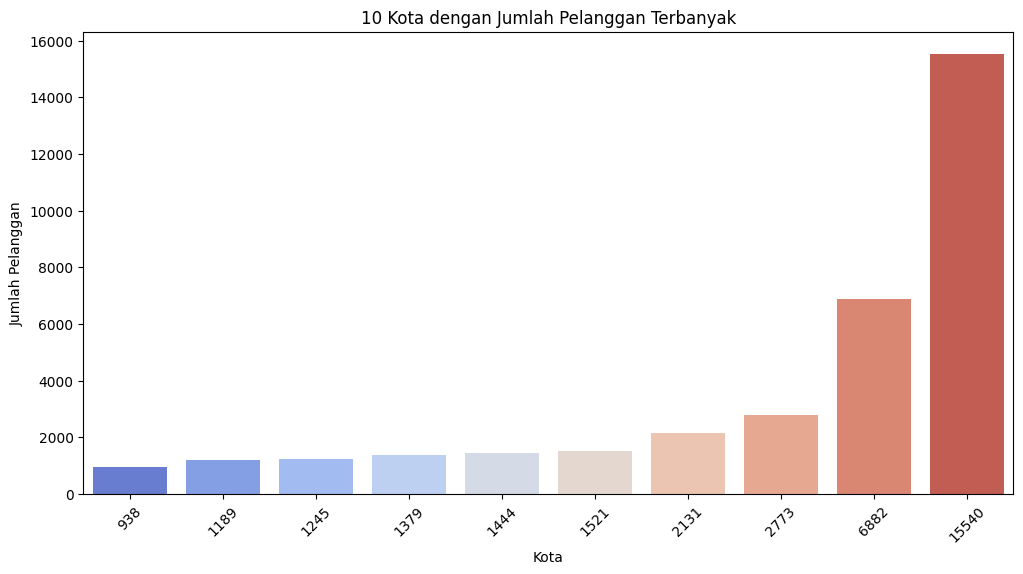

In [ ]:
city_counts = customers_df['customer_city'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts[:10], y=city_counts[:10], palette='coolwarm')
plt.title('10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Bagaimana penyebaran jumlah penjual bedasarkan negara bagian ?

<ipython-input-76-4c2930cac197>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='plasma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

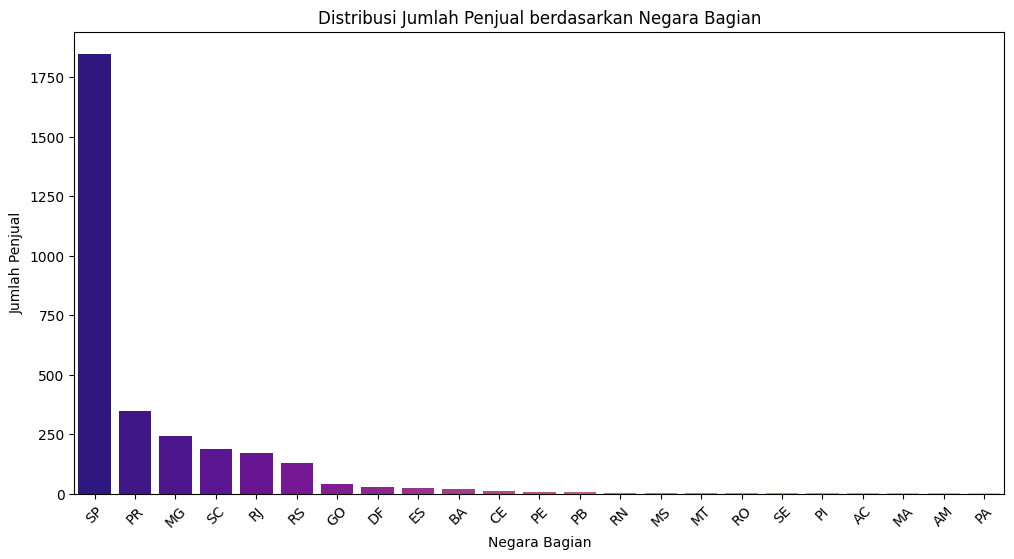

In [ ]:
state_counts = sellers_df['seller_state'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='plasma')
plt.title('Distribusi Jumlah Penjual berdasarkan Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Penjual')
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Negaea bagian SP menduduki peringkat pertama dalam penyebaran jumlah penjual

### Bagaimana persebaran banyak produk terjual bedasarkan kategori ?

<ipython-input-11-382c8ed01a02>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values[:10], y=category_counts.index[:10], palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

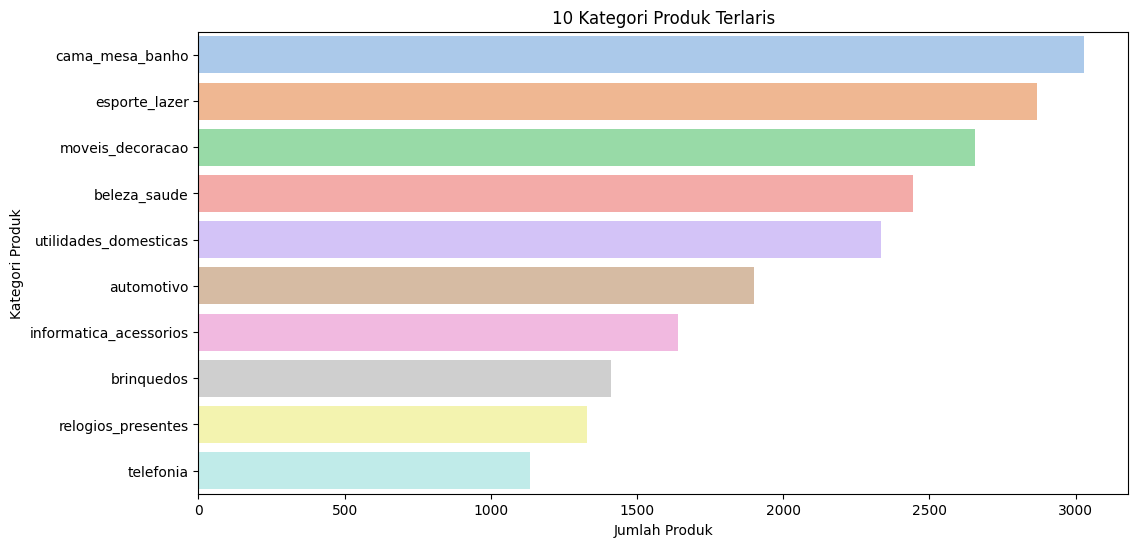

In [11]:
category_counts = products_df['product_category_name'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values[:10], y=category_counts.index[:10], palette='pastel')
plt.title('10 Kategori Produk Terlaris')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Produk')
plt.show()


Kategori produk terlaris jatuh pada cama mesa banho

### Bagaimana penyebaran status pesanannya ?

<ipython-input-15-6e75d635d69f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_distribution.index, y=status_distribution.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

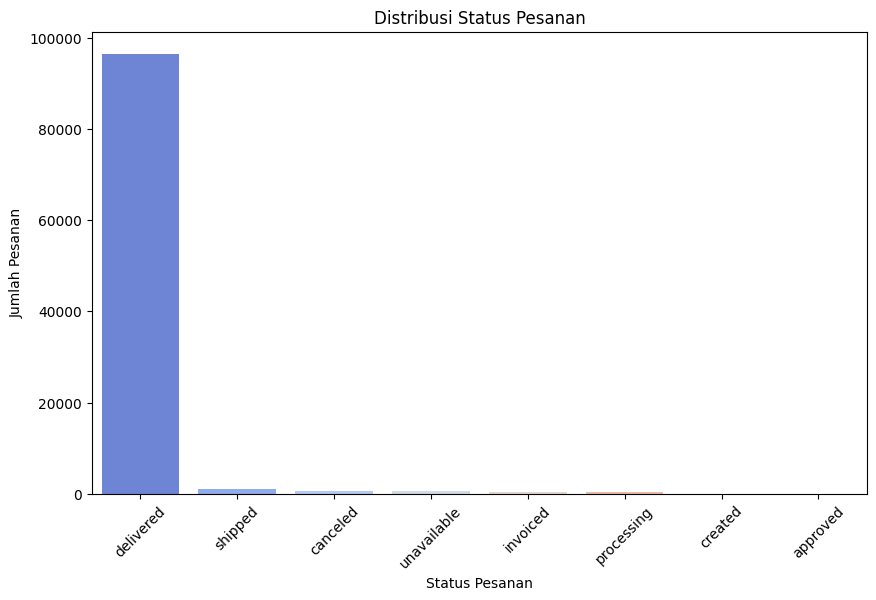

In [15]:
status_distribution = orders_df['order_status'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=status_distribution.index, y=status_distribution.values, palette='coolwarm')
plt.title('Distribusi Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

Status pesanan pada grafik terpantau sudah berhasil sampai pada customer

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Kota terbanyak pembeli jatuh pada kota Sao Paulo
- Conclution pertanyaan 2 : Negara bagian SP menduduki peringkat pertama dalam banyaknya jumlah seller
- Conclution pertanyaan 3 : Kategori produk yang paling laris terjual adalah cama mesa banho
- Conclution pertanyaan 4 : Semua status pesanan didapati 99% sudah diterima oleh customer

In [17]:
all_tables = {
    'orders': orders_df,
    'customers': customers_df,
    'products': products_df,
    'sellers': sellers_df
}

all_df = pd.concat(all_tables.values(), axis=0, ignore_index=True)

all_df.to_csv('all_data.csv', index=False)

In [18]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_df.to_csv('all_data.csv', index=False)